# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [2]:
def balance_white_patch(img, white_px_row, white_px_col):
    # Define white patch and the coefficients
    white = img[white_px_row, white_px_col, :]
    coeffs = 255.0/white

    # Apply white balancing and generate balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * coeffs[channel]

    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced / 255
    balanced[balanced > 1] = 1

    return balanced

### Gray world
This algorithm assumes that a scene, on average, is gray.

In [3]:
def balance_gray_world(img):
    # Compute the mean values for all three colour channels (red, green, blue)
    mean_r = img[..., 0].mean()
    mean_g = img[..., 1].mean()
    mean_b = img[..., 2].mean()

    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    mean_max = max(mean_r, mean_g, mean_b)
    kr = mean_max / mean_r
    kg = mean_max / mean_g
    kb = mean_max / mean_b

    # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., 0] = img[..., 0] * kr
    balanced[..., 1] = img[..., 1] * kg
    balanced[..., 2] = img[..., 2] * kb

    # Clip image
    balanced /= 255
    balanced[balanced > 1] = 1

    return balanced

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

In [4]:
def balance_scale_by_max(img):
    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = img[..., 0].max()
    max_g = img[..., 1].max()
    max_b = img[..., 2].max()

    # Apply scale-by-max balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., 0] = img[..., 0] * 255.0 / max_r
    balanced[..., 1] = img[..., 1] * 255.0 / max_g
    balanced[..., 2] = img[..., 2] * 255.0 / max_b

    balanced /= 255

    return balanced

# Results

In [5]:
def plot_balanced_images(filename, white_px_row, white_px_col):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = [15, 12]
    plt.subplot(221, title="Original"), plt.imshow(img)
    plt.subplot(222, title="White patch"), plt.imshow(balance_white_patch(img, white_px_row, white_px_col))
    plt.subplot(223, title="Gray world"), plt.imshow(balance_gray_world(img))
    plt.subplot(224, title="Scale-by-max"), plt.imshow(balance_scale_by_max(img))

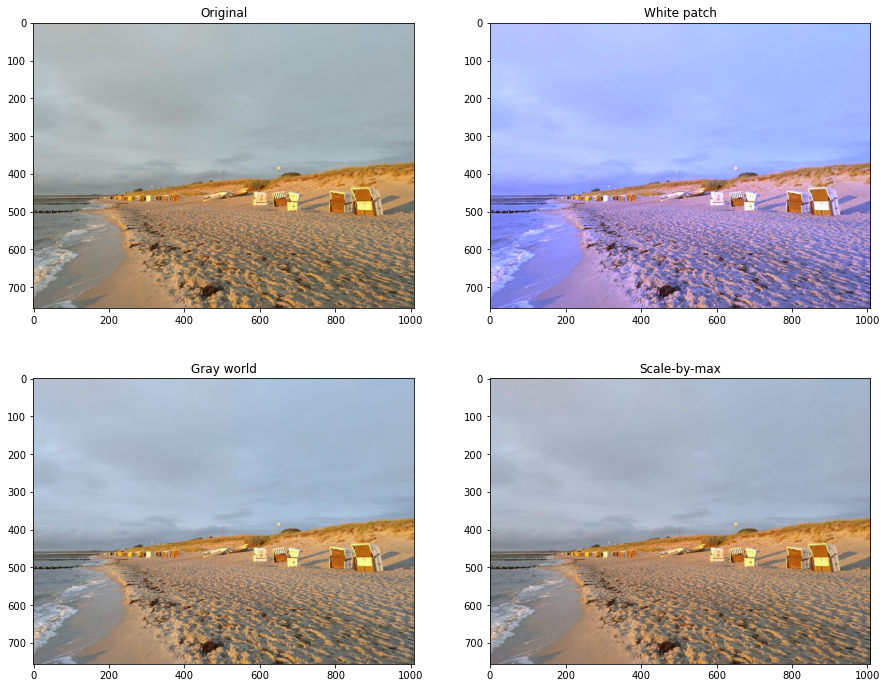

In [6]:
plot_balanced_images('data/sea.jpg', 485, 864)

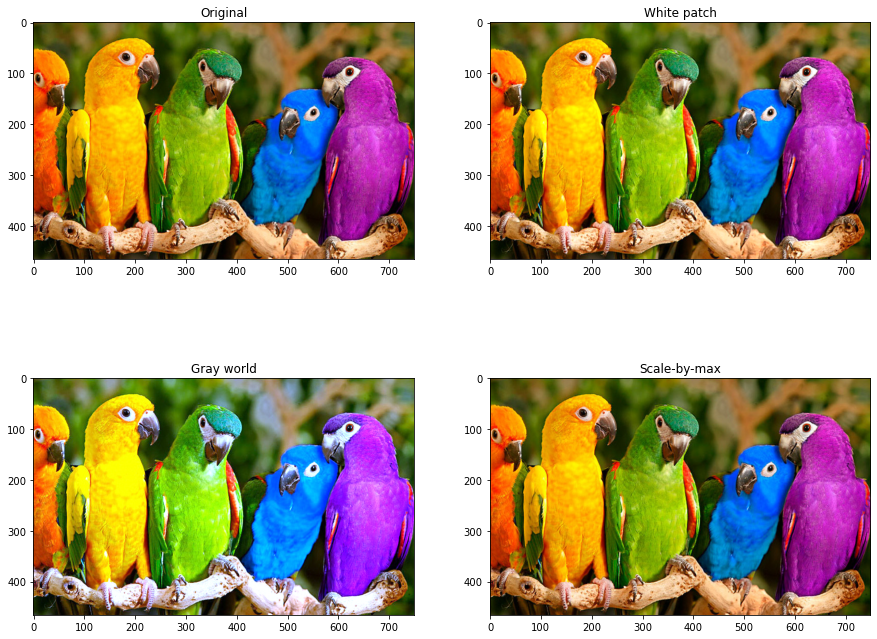

In [7]:
plot_balanced_images('data/parrots.jpg', 98, 634)

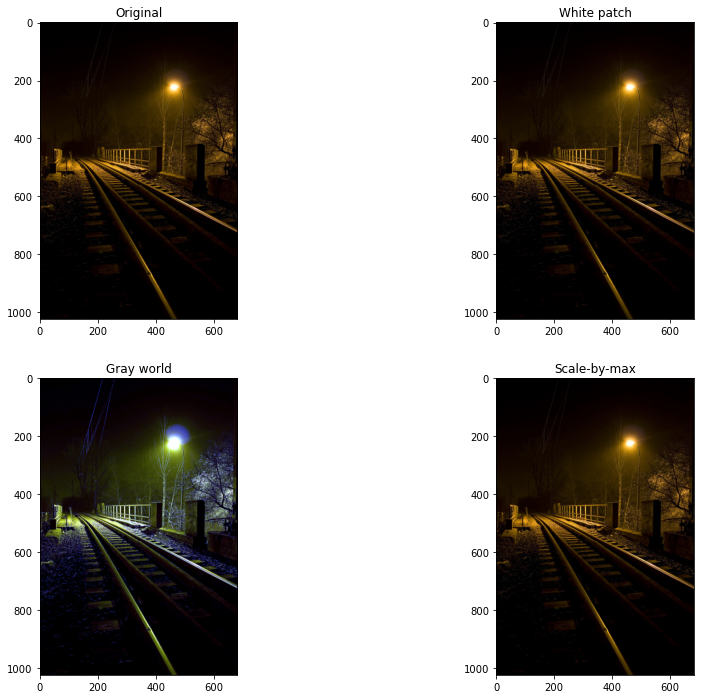

In [8]:
plot_balanced_images('data/night.jpg', 225, 462)

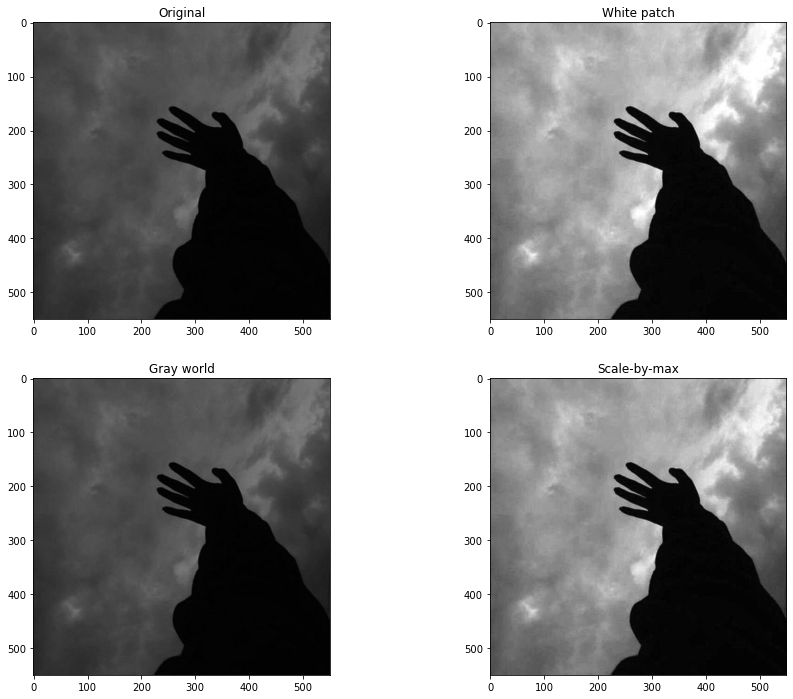

In [9]:
plot_balanced_images('data/hand.jpg', 351, 279)